## **Homework 2** Problem 1

In [1]:
!pip install wandb -qqq

%matplotlib inline

     |████████████████████████████████| 1.7 MB 6.4 MB/s 
     |████████████████████████████████| 97 kB 7.9 MB/s 
     |████████████████████████████████| 180 kB 66.3 MB/s 
     |████████████████████████████████| 139 kB 76.2 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 


### (a) Multilayer Perceptron (MLP)

Generally, when you have to deal with image, text, audio or video data,
you can use standard python packages that load data into a numpy array.
Then you can convert this array into a ``torch.Tensor``.

For vision, PyTorch has a package called ``torchvision``, 
that has data loaders for common datasets such as Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz., ``torchvision.datasets`` 
and ``torch.utils.data.DataLoader``.
This provides a huge convenience and avoids writing boilerplate code.



Load MNIST dataset using `torchvision.datasets`.

In [2]:
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torch.utils.data import ConcatDataset
import wandb


mnist_trainset = datasets.MNIST(
  root = 'data',
  train = True,                         
  transform = transforms.ToTensor(), 
  download = True,            
)
mnist_testset = datasets.MNIST(
  root = 'data',
  train = False,                         
  transform = transforms.ToTensor(), 
  download = True,            
)
print("Print the training dataset:\n ", mnist_trainset)
print("Print the testing dataset:\n ", mnist_testset)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Print the training dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Print the testing dataset:
  Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Visualize dataset.

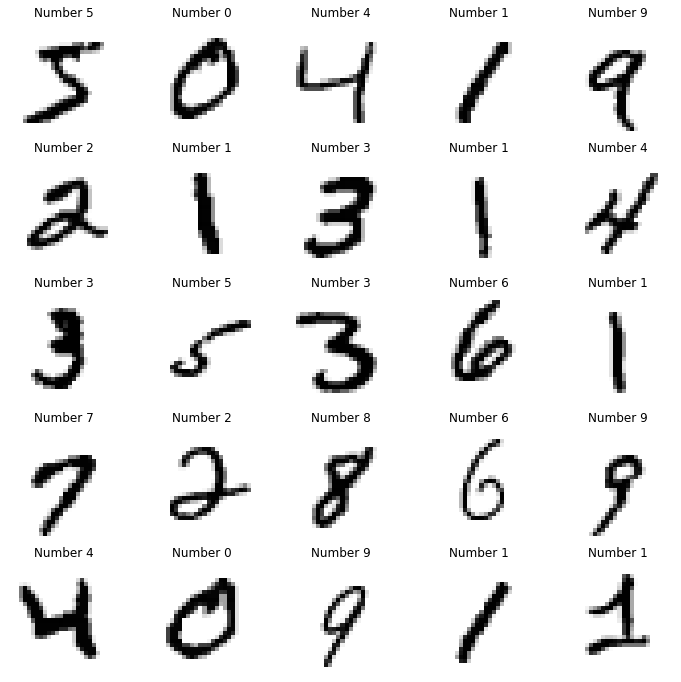

In [3]:
import matplotlib.pyplot as plt
from matplotlib import cm

fig, axs = plt.subplots(5, 5, figsize = (12, 12))
plt.gray()

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
  ax.imshow(mnist_trainset[i][0][0], cmap=cm.gray_r)
  ax.axis('off')
  ax.set_title('Number {}'.format(mnist_trainset[i][1]))

Create dataloader for neural network.

In [4]:
from torch.utils.data import DataLoader

train_loader = DataLoader(mnist_trainset, batch_size=64, shuffle=True)
test_loader = DataLoader(mnist_testset, batch_size=64, shuffle=True)
print(train_loader)
print(test_loader)

Iterate through the dataloader.

In [5]:
for batch_id, (data, label) in enumerate(train_loader):
  print('batch_id:', batch_id)
  print(data.shape)
  break

batch_id: 0
torch.Size([64, 1, 28, 28])


Follow the above instructions on MNIST dataset, write code to load and visualize the CIFAR-10 dataset in the similar manner.

CIFAR-10 dataset has the classes (listed below): ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of size $3 \times 32 \times 32$, i.e. 3-channel color images of $32 \times 32$ pixels in size. 

<h4>Note:</h4>
The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].

In [6]:
batch_size = 128
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 
           'ship', 'truck')

# original Images
base_transforms = [
  transforms.ToTensor(),
  transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
]
cifar_trainset = datasets.CIFAR10(
  root = 'data',
  train = True,  
  transform = transforms.Compose(base_transforms),                       
  download = True,            
)

# randomly flipped images
flipped_trans = base_transforms.copy() 
flipped_trans.insert(0, transforms.RandomHorizontalFlip())
cifar_flipped = datasets.CIFAR10(
  root = 'data',
  train = True,  
  transform = transforms.Compose(flipped_trans),                       
  download = True,            
)

# randomly rotated images
rotated_trans = base_transforms.copy() 
rotated_trans.insert(0, transforms.RandomRotation((90,90)))
cifar_rotated = datasets.CIFAR10(
  root = 'data',
  train = True,  
  transform = transforms.Compose(rotated_trans),                       
  download = True,            
)

# add noise
noise_trans = base_transforms.copy() 
noise_trans.insert(0, transforms.GaussianBlur(kernel_size=3))
cifar_noise = datasets.CIFAR10(
  root = 'data',
  train = True,  
  transform = transforms.Compose(noise_trans),                       
  download = True,            
)

# randomly shift images up/down
shift_trans = base_transforms.copy() 
shift_trans.insert(0, transforms.RandomAffine(degrees=0, translate=(.1,.1)))
cifar_shift = datasets.CIFAR10(
  root = 'data',
  train = True,  
  transform = transforms.Compose(shift_trans),                       
  download = True,            
)

full_trainset = ConcatDataset([cifar_trainset, cifar_flipped, cifar_rotated, cifar_noise, cifar_shift])

val_size = int(len(full_trainset)*.2)
train_size = int(len(full_trainset) - val_size)
train_ds, val_ds = random_split(full_trainset, [train_size, val_size])

cifar_train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, pin_memory=True)
cifar_val_loader = DataLoader(val_ds, batch_size=batch_size, pin_memory=True)

# setup test set
cifar_testset = datasets.CIFAR10(
  root = 'data',
  train = False,                         
  transform = transforms.Compose(base_transforms), 
  download = True,            
)

cifar_test_loader = DataLoader(cifar_testset, batch_size=batch_size, pin_memory=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


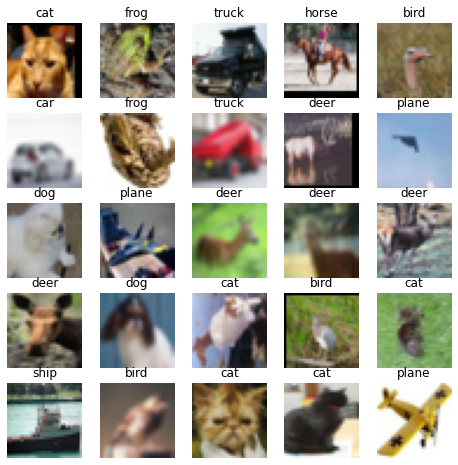

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def cifar_imshow(img):
  img = img / 2 + 0.5     # unnormalize
  npimg = img.numpy()
  return np.transpose(npimg, (1, 2, 0))

images, labels = iter(cifar_train_loader).next()

fig, axs = plt.subplots(5, 5, figsize = (8, 8))
for i, ax in enumerate(axs.flat):
  ax.imshow(cifar_imshow(images[i]))
  ax.axis('off')
  ax.set_title('{}'.format(classes[labels[i]]))

Define an MLP neural network to do classification on CIFAR-10 dataset. 
To feed the data into the MLP, each image with dim of $3 \times 32 \times 32$ needs to be flatten into a vector with dim of $3072$.

Just like how you transfer a Tensor onto the GPU, you transfer the neural net onto the GPU. Let's first define our device as the first visible cuda device if we have CUDA available.

**Note**: remember to keep the logs of training the different models.

In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [9]:
import torch.nn as nn

class MLP(nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    self.flatten = nn.Flatten()
    self.mlp = nn.Sequential(
        nn.Dropout(.3),
        nn.Linear(3072, 2048),
        nn.ReLU(),
        nn.Dropout(.3),
        nn.Linear(2048, 1024),
        nn.ReLU(),
        nn.Dropout(.3),
        nn.Linear(1024, 512),
        nn.ReLU(),
        nn.Dropout(.3),   
        nn.Linear(512, 10)
    )

  def forward(self, x):
    return self.mlp(self.flatten(x))


mlp = MLP().to(device)  # operate on GPU

Define a loss function and optimizer.

In [10]:
import torch.optim as optim

# TODO: you can change loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(mlp.parameters(), lr=0.001, momentum=0.9)

Train the network. 

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.

In [11]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        optimizer.zero_grad()

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()

        #if batch % 100 == 0:
        loss, current = loss.item(), batch * len(X)
        if batch % 100 == 0:
          print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

1. Train Model

In [12]:
epochs = 20
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(cifar_train_loader, mlp, criterion, optimizer)
    test(cifar_val_loader, mlp, criterion)
print("Done!")

Epoch 1
-------------------------------
loss: 2.297367  [    0/200000]
loss: 2.297426  [12800/200000]
loss: 2.285653  [25600/200000]
loss: 2.274351  [38400/200000]
loss: 2.236511  [51200/200000]
loss: 2.213811  [64000/200000]
loss: 2.150551  [76800/200000]
loss: 2.078019  [89600/200000]
loss: 2.057302  [102400/200000]
loss: 2.022857  [115200/200000]
loss: 2.026091  [128000/200000]
loss: 1.916582  [140800/200000]
loss: 2.044417  [153600/200000]
loss: 2.006256  [166400/200000]
loss: 1.977225  [179200/200000]
loss: 2.011484  [192000/200000]
Test Error: 
 Accuracy: 31.9%, Avg loss: 1.904504 

Epoch 2
-------------------------------
loss: 1.897942  [    0/200000]
loss: 1.971351  [12800/200000]
loss: 1.812405  [25600/200000]
loss: 1.934253  [38400/200000]
loss: 1.884273  [51200/200000]
loss: 1.930642  [64000/200000]
loss: 1.986612  [76800/200000]
loss: 1.876816  [89600/200000]
loss: 1.750512  [102400/200000]
loss: 1.748827  [115200/200000]
loss: 1.895390  [128000/200000]
loss: 1.804331  [140

Save the trained model. 
See [here](https://pytorch.org/docs/stable/notes/serialization.html)
for more details on saving PyTorch models.

In [13]:
PATH = './mlp_cifar10.pth'
torch.save(mlp.state_dict(), PATH)

Load back in our saved model. (Note: saving and re-loading the model
wasn't necessary here, we only did it to illustrate how to do so)



In [14]:
mlp = MLP().to(device)
mlp.load_state_dict(torch.load(PATH))

<All keys matched successfully>

Evaluate the classfication performance on the testing set.

In [15]:
test(cifar_test_loader, mlp, criterion)

Test Error: 
 Accuracy: 56.2%, Avg loss: 1.235380 



### (c) Convolution Neural Network (CNN)

Define a CNN to do classification on CIFAR-10 dataset. You can build a CNN from the previous PyTorch tutorial code and modify it to take 3-channel images (instead of 1-channel images as it was defined).

**Note**: remember to keep the logs of training the different models.

In [16]:
import torch.nn as nn
import torch.nn.functional as F

class BaseNet(nn.Module):
    def _make_layers(self, cfg, kernel, padding):
      layers = []
      in_channels = 3
      for x in cfg:
          if x == 'M':
              layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
          else:
              layers += [nn.Conv2d(in_channels, x, kernel_size=kernel, padding=padding),
                          nn.ReLU(inplace=True)]
              in_channels = x
      return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)

1. LeNet Style Model 

In [17]:
class LeNetCnn(BaseNet):
    def __init__(self, cfg):
        super().__init__()
        self.conv = self._make_layers([6, 'M', 16, 'M'], cfg['kernel'], cfg['padding'])

        self.fc = nn.Sequential(
          nn.Dropout(cfg['dropout']),
          nn.Linear(cfg['start'], cfg['l1']),
          nn.ReLU(inplace=True),
          nn.Dropout(cfg['dropout']),
          nn.Linear(cfg['l1'], cfg['l2']),
          nn.ReLU(inplace=True),
          nn.Dropout(cfg['dropout']),
          nn.Linear(cfg['l2'], 10)
        )

In [24]:
cfgs = [
  {"kernel": 3, "dropout": 0, "padding": 0, "start": 576, "l1": 288, "l2": 144},
  {"kernel": 3, "dropout": 0, "padding": 1, "start": 1024, "l1": 512, "l2": 256},
  {"kernel": 3, "dropout": .3, "padding": 1, "start": 1024, "l1": 512, "l2": 256},
  {"kernel": 5, "dropout": 0, "padding": 0, "start": 400, "l1": 120, "l2": 84},
  {"kernel": 5, "dropout": 0, "padding": 1, "start": 576, "l1": 288, "l2": 144},
  {"kernel": 5, "dropout": .3, "padding": 1, "start": 576, "l1": 288, "l2": 144}
]

for c in cfgs:
  cnn = LeNetCnn(c).to(device)    

  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(cnn.parameters(), lr=0.001)

  cnn_epoch = 10
  for t in range(cnn_epoch):
    print(f"Epoch {t+1}\n-------------------------------")
    train(cifar_train_loader, cnn, criterion, optimizer)
    test(cifar_val_loader, cnn, criterion)

  print(f'Config: {c}')
  test(cifar_test_loader, cnn, criterion)

print("Done!")

Epoch 1
-------------------------------
loss: 2.302049  [    0/200000]
loss: 1.744069  [12800/200000]
loss: 1.793392  [25600/200000]
loss: 1.705858  [38400/200000]
loss: 1.677867  [51200/200000]
loss: 1.591739  [64000/200000]
loss: 1.570633  [76800/200000]
loss: 1.579857  [89600/200000]
loss: 1.407765  [102400/200000]
loss: 1.463330  [115200/200000]
loss: 1.442352  [128000/200000]
loss: 1.295187  [140800/200000]
loss: 1.406562  [153600/200000]
loss: 1.359728  [166400/200000]
loss: 1.234909  [179200/200000]
loss: 1.261037  [192000/200000]
Test Error: 
 Accuracy: 53.8%, Avg loss: 1.303497 

Epoch 2
-------------------------------
loss: 1.460423  [    0/200000]
loss: 1.099934  [12800/200000]
loss: 1.172507  [25600/200000]
loss: 1.439443  [38400/200000]
loss: 1.062881  [51200/200000]
loss: 0.968545  [64000/200000]
loss: 1.161905  [76800/200000]
loss: 1.127600  [89600/200000]
loss: 1.189781  [102400/200000]
loss: 1.271422  [115200/200000]
loss: 1.124341  [128000/200000]
loss: 1.116099  [140

In [25]:
import torch.nn as nn
import torch.nn.functional as F

class Conv5Net(BaseNet):
    def __init__(self, cfg):
        super().__init__()
        
        self.conv = self._make_layers(
            [32, 64, 'M', 128, 128, 'M', 256, 'M'], cfg['kernel'], cfg['padding']
        )

        self.fc = nn.Sequential(
          nn.Dropout(cfg['dropout']),
          nn.Linear(cfg['start'], cfg['l1']),
          nn.ReLU(inplace=True),
          nn.Dropout(cfg['dropout']),
          nn.Linear(cfg['l1'], cfg['l2']),
          nn.ReLU(inplace=True),
          nn.Dropout(cfg['dropout']),
          nn.Linear(cfg['l2'], 10)
        )

Train the network.

In [32]:
cfgs = [
  {"kernel": 3, "dropout": 0, "padding": 0, "start": 256, "l1": 128, "l2": 64},
  {"kernel": 3, "dropout": .3, "padding": 0, "start": 256, "l1": 128, "l2": 64},
  {"kernel": 3, "dropout": 0, "padding": 1, "start": 4096, "l1": 1024, "l2": 512},
  {"kernel": 3, "dropout": .3, "padding": 1, "start": 4096, "l1": 1024, "l2": 512},
  {"kernel": 5, "dropout": 0, "padding": 1, "start": 256, "l1": 128, "l2": 64},
  {"kernel": 5, "dropout": .3, "padding": 1, "start": 256, "l1": 128, "l2": 64}
]

for c in cfgs:
  cnn = Conv5Net(c).to(device)    

  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(cnn.parameters(), lr=0.001)

  cnn_epoch = 10
  for t in range(cnn_epoch):
    print(f"Epoch {t+1}\n-------------------------------")
    train(cifar_train_loader, cnn, criterion, optimizer)
    test(cifar_val_loader, cnn, criterion)

  print(f'Config: {c}')
  test(cifar_test_loader, cnn, criterion)

print("Done!")

Epoch 1
-------------------------------
loss: 2.306042  [    0/200000]
loss: 1.944475  [12800/200000]
loss: 1.860330  [25600/200000]
loss: 1.728424  [38400/200000]
loss: 1.712054  [51200/200000]
loss: 1.454998  [64000/200000]
loss: 1.562312  [76800/200000]
loss: 1.708249  [89600/200000]
loss: 1.508871  [102400/200000]
loss: 1.477233  [115200/200000]
loss: 1.306311  [128000/200000]
loss: 1.246944  [140800/200000]
loss: 1.430159  [153600/200000]
loss: 1.413048  [166400/200000]
loss: 1.096864  [179200/200000]
loss: 1.244929  [192000/200000]
Test Error: 
 Accuracy: 57.3%, Avg loss: 1.189340 

Epoch 2
-------------------------------
loss: 1.205323  [    0/200000]
loss: 1.159551  [12800/200000]
loss: 1.116604  [25600/200000]
loss: 1.001722  [38400/200000]
loss: 0.966356  [51200/200000]
loss: 1.069115  [64000/200000]
loss: 1.255489  [76800/200000]
loss: 0.960486  [89600/200000]
loss: 1.131435  [102400/200000]
loss: 0.983693  [115200/200000]
loss: 1.050834  [128000/200000]
loss: 1.074116  [140

**Table of Results**


Network | Kernel | Dropout | Padding | Test Acc.
--------|--------|---------|---------|-----------
LeNet   |3       | 0       | 0.      | 68.1%
LeNet   |3       | 0       | 1.      | 69.0%
LeNet   |3       | .3      | 1.      | 70.1%
LeNet   |5       | 0       | 0.      | 65.9%
LeNet   |5       | 0       | 1.      | 67.9%
LeNet   |5       | .3      | 1.      | 68.7%
Conv5   |3       | 0       | 0.      | 78.8%
Conv5   |3       | .3      | 0.      | 77.8%
Conv5   |3       | 0       | 1.      | 82.4%
Conv5   |3       | .3      | 1.      | 84.3%
Conv5   |5       | 0       | 1.      | 79.1%
Conv5   |5       | .3      | 1.      | 79.1%



**Conclusion**: The best network from the table above had a test accuracy rate of 84.3%

**Train Best Network**

In [33]:
  best_cnn = Conv5Net(cfgs[3]).to(device)    

  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(best_cnn.parameters(), lr=0.001)

  cnn_epoch = 10
  for t in range(cnn_epoch):
    print(f"Epoch {t+1}\n-------------------------------")
    train(cifar_train_loader, best_cnn, criterion, optimizer)
    test(cifar_val_loader, best_cnn, criterion)

Epoch 1
-------------------------------
loss: 2.300621  [    0/200000]
loss: 1.879633  [12800/200000]
loss: 1.741872  [25600/200000]
loss: 1.619577  [38400/200000]
loss: 1.471865  [51200/200000]
loss: 1.346882  [64000/200000]
loss: 1.417067  [76800/200000]
loss: 1.328035  [89600/200000]
loss: 1.184920  [102400/200000]
loss: 1.245198  [115200/200000]
loss: 1.170316  [128000/200000]
loss: 1.029537  [140800/200000]
loss: 1.305243  [153600/200000]
loss: 0.968720  [166400/200000]
loss: 0.965795  [179200/200000]
loss: 0.980900  [192000/200000]
Test Error: 
 Accuracy: 67.9%, Avg loss: 0.912959 

Epoch 2
-------------------------------
loss: 1.002728  [    0/200000]
loss: 0.887485  [12800/200000]
loss: 0.858690  [25600/200000]
loss: 1.318590  [38400/200000]
loss: 0.831109  [51200/200000]
loss: 0.978830  [64000/200000]
loss: 0.924758  [76800/200000]
loss: 0.831461  [89600/200000]
loss: 0.658682  [102400/200000]
loss: 0.745053  [115200/200000]
loss: 0.654968  [128000/200000]
loss: 0.674437  [140

Save the trained model. (Do not upload your trained model to Canvas.)

In [34]:
PATH = './cnn_cifar10.pth'
torch.save(best_cnn.state_dict(), PATH)

Evaluate the classfication performance on the testing set.

In [35]:
test(cifar_test_loader, best_cnn, criterion)


Test Error: 
 Accuracy: 84.4%, Avg loss: 0.495904 



### (d) Discussions

1. Which framework can achieve higher accuracy, MLP or CNN? Briefly explain the reason.

Spatial information is lost when the image is flattened for use in an MLP network. For example,

* A group of nearby pixels will form a coherent feature of an image that may be a defining characteristic that could be used to identify it. 
* If the relative location of features, like a human nose, is in a different position in an image then an MLP network will likely be thrown off because it sees such features globally due to it being fully connected. 

2. Which parameter can potentially affect your performance most? 

From the two networks above the depth of the convolution network makes the biggest difference in the test accuracy. The hyperparameter that made the most difference for a given network was getting the kernal size.